# 프로젝트 개요
     * 사람의 움직임에 대한 센서 입력값을 통해 실제 사람이 어떤 동작(Activity)을 하는지에 대한 데이터 세트임.
     * 센서의 입력 값들을 통해 어떠한 동작을 하고 있는지 분류하는 코드를 작성해보고자 함.

## 라이브러리 호출

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [44]:
import warnings
warnings.filterwarnings('ignore')

## 데이터 호출
    * Train data: human_activity_test.csv
    * Test data: human_activity_train.csv

In [3]:
train = pd.read_csv('datasets/human_activity_train.csv')
test = pd.read_csv('datasets/human_activity_test.csv')

### train data

In [4]:
train.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,STANDING


In [5]:
train.shape

(7352, 563)

    * 563개의 컬럼 (562개의 feature, 1개의 target label)로 구성되어 있으며, 7352개의 데이터 세트로 구성되어 있음.

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


    * 561개의 실수형 자료, 1개의 정수형 자료, 1개의 object형 자료로 구성되어 있음.

In [8]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


    * 561개의 feature값은 최소값 -1에서 최대값 1까지의 값을 갖고 있음.
    * 하지만 각 값들의 평균, 중앙값, 표준편차들이 다르므로, 다른 분포값을 갖고 있음.
    * 이번 분류에서는 이 값들을 정규화 처리를 진행해서 분류를 진행해보고자 함.

In [12]:
set(train.subject)

{1, 3, 5, 6, 7, 8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30}

    * subject 컬럼은 실험자에 대한 번호이기 때문에 분류하는 feature로 사용하지 않아야 함.
    * 학습 및 훈련 시에는 제외한 값을 이용해서 진행

In [49]:
set(train.Activity)

{'LAYING',
 'SITTING',
 'STANDING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS'}

In [14]:
train.isnull().sum().sum()

0

    * train 데이터 내에 null값 없음.

### test data

In [17]:
test.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
5,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,STANDING
6,0.279746,-0.018271,-0.104000,-0.995819,-0.976354,-0.977725,-0.995996,-0.973665,-0.979253,-0.937856,...,-0.391286,-0.309083,-0.000857,0.728514,-0.333771,-0.690085,0.295282,-0.067065,2,STANDING
7,0.274601,-0.025035,-0.116831,-0.995594,-0.982069,-0.985262,-0.995341,-0.981485,-0.984610,-0.941263,...,-0.672358,-0.025526,-0.214033,0.437640,-0.366674,-0.688785,0.295981,-0.067706,2,STANDING
8,0.272529,-0.020954,-0.114472,-0.996784,-0.975906,-0.986597,-0.997029,-0.973735,-0.985556,-0.941263,...,-0.853248,0.144626,-0.035564,-0.181800,0.087320,-0.685390,0.299394,-0.065491,2,STANDING
9,0.275746,-0.010372,-0.099776,-0.998373,-0.986933,-0.991022,-0.998663,-0.987140,-0.991084,-0.943761,...,-0.741435,0.157584,-0.033487,-0.350893,0.343146,-0.684110,0.300822,-0.064263,2,STANDING


In [18]:
test.shape

(2947, 563)

    * test데이터는 2947개의 데이터 세트로 이루어져 있음.

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [22]:
test.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


    * 대부분의 데이터 값이 -1~1사이에 분포했던 train 데이터와는 다르게 데이터 분포 범위가 더 적은 feature들이 있는 것으로 보임.

In [23]:
set(test.subject)

{2, 4, 9, 10, 12, 13, 18, 20, 24}

    * train 데이터에 없는 사람들에 대한 데이터 값들임.

In [24]:
set(test.subject) in set (train.subject)

False

In [50]:
set(test.Activity)

{'LAYING',
 'SITTING',
 'STANDING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS'}

In [25]:
train.isnull().sum().sum()

0

    * train 데이터에도 null값이 없음을 확인함.

### 데이터 전처리

#### Outlier 처리
    * 평균 +- 3*표준편차를 기준으로 outlier를 판단.
    * outlier는 경계값으로 치환하여 처리함.

In [33]:
lowerB = train.iloc[:,:-2].mean() - 3 * train.iloc[:,:-2].std()
upperB = train.iloc[:,:-2].mean() + 3 * train.iloc[:,:-2].std()

np.where((train.iloc[:,:-2] < lowerB) | (train.iloc[:,:-2] > upperB))[0].shape

(40495,)

    * 4,124,472개(561 * 7352)의 데이터 중 40,495개의 데이터 값이 outlier에 해당됨.

In [38]:
# lowerB보다 작은 경우, lowerB로 변환
# upperB보다 큰 경우, upperB로 변환
# 나머지 값들은 유지
train_no_outlier = np.where(train.iloc[:,:-2]<lowerB,lowerB,
                           np.where(train.iloc[:,:-2]>upperB, upperB,
                                   train.iloc[:,:-2]))

X_train = pd.DataFrame(train_no_outlier, columns = train.columns[:-2])
y_train = train.Activity

np.where((X_train < lowerB) | (X_train > upperB))[0].shape

(0,)

    * outlier이 모두 제거된 데이터들이 X_train에 저장되었음을 확인함.

In [39]:
# test data 전처리
test_no_outlier = np.where(test.iloc[:,:-2]<lowerB,lowerB,
                           np.where(test.iloc[:,:-2]>upperB, upperB,
                                   test.iloc[:,:-2]))

X_test = pd.DataFrame(test_no_outlier, columns = test.columns[:-2])
y_test = test.Activity

np.where((X_test < lowerB) | (X_test > upperB))[0].shape

(0,)

    * test 데이터에서도 outlier가 모두 경계값으로 치환되었음을 확인함.

#### 정규화

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 분류 알고리즘 적용

#### kNN 알고리즘

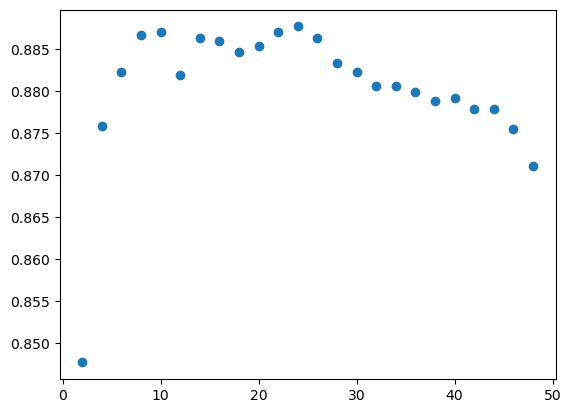

In [51]:
from sklearn.neighbors import KNeighborsClassifier

# k값에 따른 accuracy 계산
scores = []
for k in range(2,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    scores.append(score)

plt.scatter(range(2,50,2), scores)
    

    * 전체 범위에서의 k값은 0.87이상으로 높은 수준의 점수를 보이고 있다.
    * k값이 24일때, 가장 높은 점수를 보이고 있는 것을 확인할 수 있으며, 그 이후에는 점수가 감소하고 있는 걸로 보아 train 데이터에 대해 과적합되는 
      것으로 예상됨.

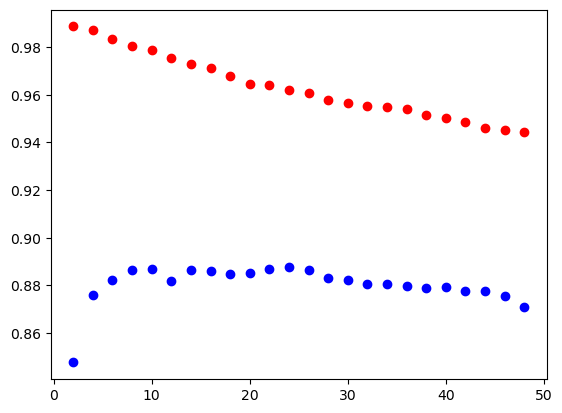

In [52]:
scores_train = []
for k in range(2,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_train_scaled, y_train)
    scores_train.append(score)

plt.scatter(range(2,50,2), scores, color = 'b')
plt.scatter(range(2,50,2), scores_train, color = 'r')
plt.show()

    * train 데이터에 대해 k값을 늘려갈수록 정확도가 점점 감소하는 것을 확인할 수 있다. 
      이는 Activity 수 대비 과도한 분류로 인해 분류 성능이 감소하는 것으로 보임. (Activity수 6개)
    * Activity와 유사한 k값이 10인 조건을 최적 조건으로 선정함.

In [57]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print(f'knn test accuracy: {accuracy_score(y_test, y_pred):.3f}')

knn test accuracy: 0.887


#### GaussianNB

In [58]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)
print(f'GaussianNB accuracy: {accuracy_score(y_test, y_pred):.3f}')

GaussianNB accuracy: 0.785


#### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(X_train_scaled, y_train)
y_pred = tree.predict(X_test_scaled)
print(f'Decision Tree accuracy: {accuracy_score(y_test, y_pred):.3f}')

Decision Tree accuracy: 0.810


#### RandomForest

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 50, max_leaf_nodes = 16, n_jobs = -1)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print(f'Random Forest accuracy: {accuracy_score(y_test, y_pred):.3f}')

Random Forest accuracy: 0.889


#### 각 알고리즘의 최적 accuracy 비교

In [63]:
# 정규화 데이터 사용
for clf in [knn,gnb,tree,rf]:
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.8870037326094333
GaussianNB 0.7848659653885307
DecisionTreeClassifier 0.8096369189005769
RandomForestClassifier 0.8846284356973193


In [64]:
# 정규화 미적용 데이터 사용
for clf in [knn,gnb,tree,rf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.9046487953851374
GaussianNB 0.7848659653885307
DecisionTreeClassifier 0.8096369189005769
RandomForestClassifier 0.8836104513064132


    * 정규화 데이터를 사용하는 것과 정규화 하지 않는 데이터를 사용한 경우의 분류 성능은 유사 수준으로 나타남.
      이는 주어진 feature들이 분포가 일부 차이가 있었지만, -1~1 범위 내의 값으로 이루어져 있어 스케일 차이가 크게 나지 않은 것 때문으로 생각됨.
    * 전반적으로 kNN 알고리즘이 가장 높은 성능을 보이고, 그 다음으로는 랜덤포레스트 알고리즘이 높은 분류 성능을 보이는 것을 확인하였다.